Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Visualization settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [52]:
df = pd.read_csv("C:/Users/Chantal Silva/OneDrive/Escritorio/Ironhack/Week 2/Day 9/Test/lab-eda-univariate/amz_uk_price_prediction_dataset.csv/amz_uk_price_prediction_dataset.csv")

In [61]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [82]:
def exploratory_analysis(df):
    """
    Complete dataset exploratory analysis
    """
    print(" COMPLETE EXPLORATORY ANALYSIS")
    print("=" * 70)
    # Execute exploratory analysis
exploratory_analysis(df)

 COMPLETE EXPLORATORY ANALYSIS


In [53]:
category_stats = df['category'].value_counts()

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.

In [54]:
for category, count in category_stats.items():
    print(f"• {category}: {count} products")

• Sports & Outdoors: 836265 products
• Beauty: 19312 products
• Handmade Clothing, Shoes & Accessories: 19229 products
• Bath & Body: 19092 products
• Birthday Gifts: 18978 products
• Manicure & Pedicure Products: 18940 products
• Skin Care: 18769 products
• Make-up: 18756 products
• Hair Care: 18735 products
• Fragrances: 18564 products
• Handmade Gifts: 18295 products
• Handmade Home Décor: 18146 products
• Luggage and travel gear: 18142 products
• Handmade Jewellery: 18044 products
• Handmade Artwork: 17878 products
• Women: 17772 products
• Handmade Home & Kitchen Products: 17435 products
• Handmade Kitchen & Dining: 17432 products
• Men: 17417 products
• Baby: 15050 products
• Handmade: 14532 products
• Boys: 11789 products
• Girls: 10310 products
• Garden Furniture & Accessories: 9626 products
• Keyboards, Mice & Input Devices: 9597 products
• Health & Personal Care: 9569 products
• Storage & Organisation: 9569 products
• Grocery: 9564 products
• Beer, Wine & Spirits: 9553 produc

    - Which are the top 5 most listed product categories?

In [56]:
top_5 = category_stats.head(5)

2. Visualizations:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.

<Axes: xlabel='category'>

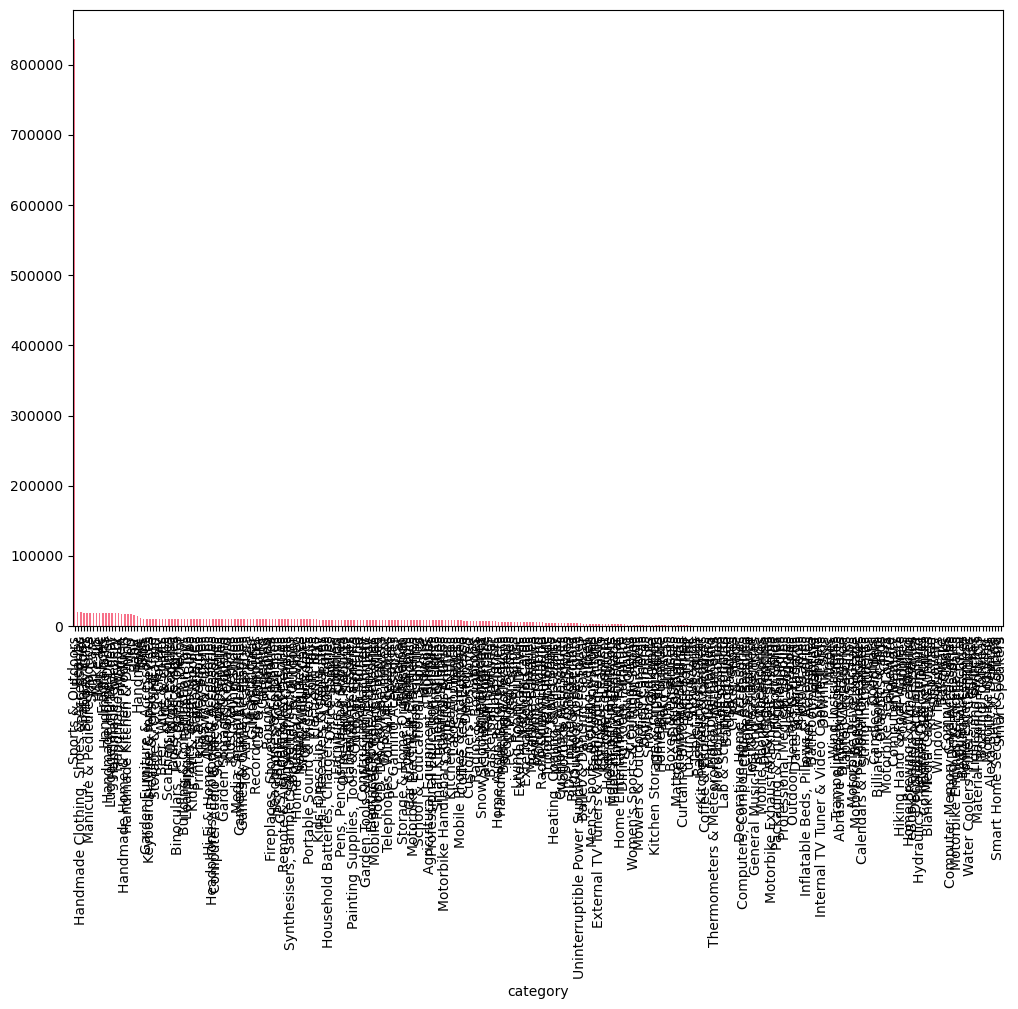

In [58]:
category_stats.plot(kind='bar')

    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [59]:
top_categories.plot(kind='pie')

NameError: name 'top_categories' is not defined

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:
    - Calculate the mean, median, and mode for the `price` of products.

In [65]:
mean_price = df['price'].mean()      
median_price = df['price'].median()  
mode_price = df['price'].mode()  
print("Mean:", mean_price)
print("Median:", median_price) 
print("Mode:", mode_price)

Mean: 89.24380943923663
Median: 19.09
Mode: 0    9.99
Name: price, dtype: float64


    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [83]:
print(f"Mean: £{mean_price:.2f}, Moda: £{mode_price.iloc[0]:.2f}")
print(f"Diference: £{mean_price - mode_price.iloc[0]:.2f}")

Mean: £89.24, Moda: £9.99
Diference: £79.25


2. Measures of Dispersion:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.

In [71]:
variance = df['price'].var()    
std_dev = df['price'].std()          
price_range = df['price'].max() - df['price'].min()
q75, q25 = np.percentile(df['price'], [75, 25])
iqr = q75 - q25                  

    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [85]:
cv = (std_dev / mean_price) * 100
if cv > 50: 
    print("High price variability")

High price variability


3. Visualizations:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.

(array([2.430975e+06, 9.272000e+03, 2.535000e+03, 4.830000e+02,
        2.170000e+02, 8.000000e+01, 4.500000e+01, 1.300000e+01,
        8.000000e+00, 1.000000e+01, 8.000000e+00, 2.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.,  16000.,  18000.,  20000.,  22000.,  24000.,  26000.,
         28000.,  30000.,  32000.,  34000.,  36000.,

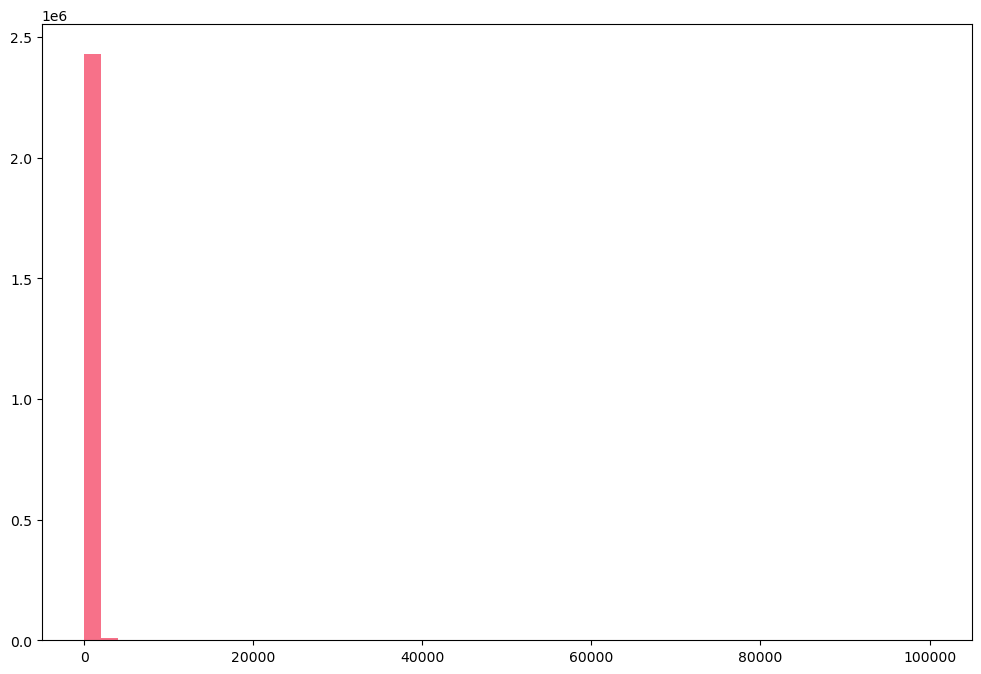

In [86]:
plt.hist(df['price'], bins=50)  # Histogram

    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

{'whiskers': [<matplotlib.lines.Line2D at 0x27a9649ed50>,
 'caps': [<matplotlib.lines.Line2D at 0x27a9649efd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a0a822e90>],
 'medians': [<matplotlib.lines.Line2D at 0x27a9649f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a9649f390>],
 'means': []}

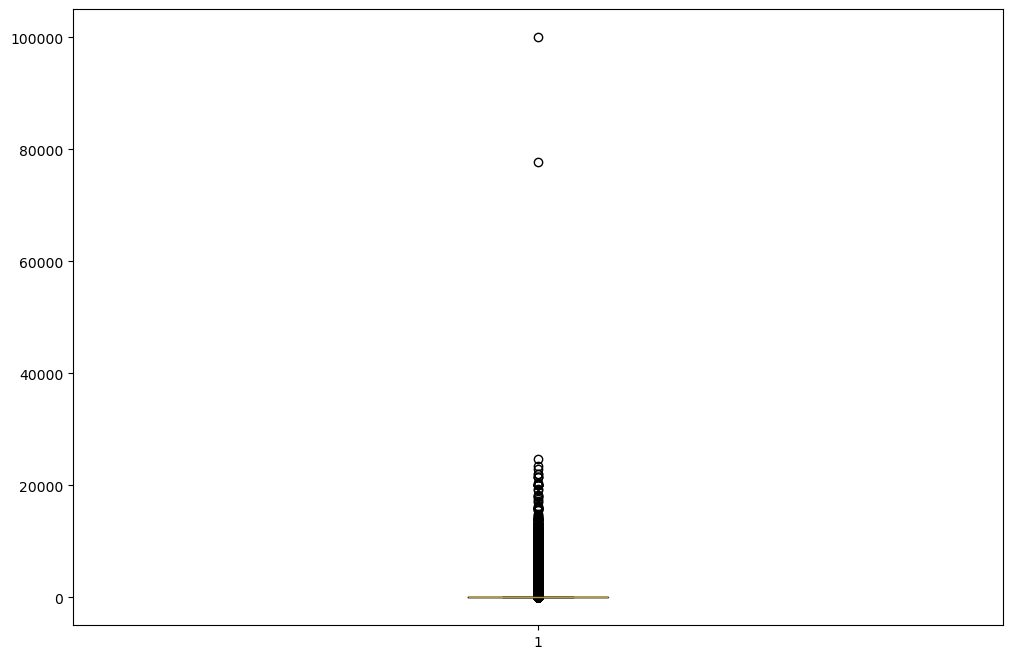

In [74]:
plt.boxplot(df['price'])  # Box plot

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:
    - Calculate the mean, median, and mode for the `rating` of products.

In [75]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median() 
mode_rating = df['stars'].mode()

    - How do customers generally rate products? Is there a common trend?

In [87]:
if mean_rating > 4.0:
    print("Tendency: Generally high rating")

2. Measures of Dispersion:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.

In [77]:
variance_rating = df['stars'].var()
std_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [88]:
if std_rating < 0.5:
    print("Consistent ratings")
else:
    print("High rating variability")

High rating variability


3. Shape of the Distribution:
    - Calculate the skewness and kurtosis for the `rating` column. 

In [ ]:
skewness = stats.skew(df['stars'])
kurtosis = stats.kurtosis(df['stars'])

    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [89]:
if skewness < -0.5:
    print("Distribution with tendency to HIGH ratings")
elif skewness > 0.5:
    print("Distribution with tendency to LOW ratings")
else:
    print("Distribution aproximatelly normal")

Distribution aproximatelly normal


4. Visualizations:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

(array([1.225641e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        8.510000e+03, 2.270000e+02, 7.280000e+02, 5.490000e+02,
        5.043000e+03, 1.794000e+03, 5.786000e+03, 5.647000e+03,
        2.326900e+04, 1.862400e+04, 5.202900e+04, 6.443100e+04,
        2.180750e+05, 2.487290e+05, 3.831380e+05, 1.814310e+05]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

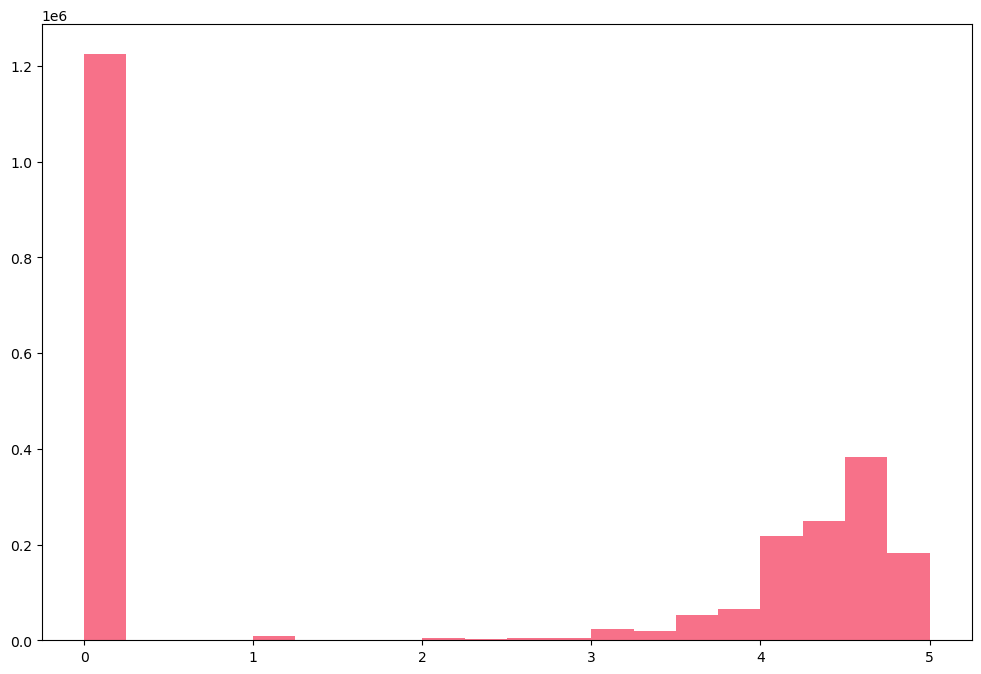

In [ ]:
plt.hist(df['stars'], bins=20)